<a href="https://colab.research.google.com/github/PatriciaLucas/CNN/blob/master/Forecast_ETo_EnsembleCNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference evapotranspiration prediction with ensemble CNN3

  


In [10]:
!pip install keras-tcn==2.8.3
!git clone https://github.com/PatriciaLucas/CNN
from CNN import Ensemble as es
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

fatal: destination path 'CNN' already exists and is not an empty directory.


##Database

In [0]:
def get_search_dataset():
    df1 = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/ETo_setelagoas.csv', sep=',')
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[8035:] #ano de teste: 2015
    return train, test

##Performs ensemble CNN3 with 6 models


In [0]:
train, test = get_search_dataset()
rmse, yhat, kde_list = es.executa(train, test, 2, 6)

In [13]:
for i in range(10):
  print("RMSE do horizonte de previsão ",i+1, " : ", rmse[i])

RMSE do horizonte de previsão  1  :  0.7662541593635931
RMSE do horizonte de previsão  2  :  0.783551150739637
RMSE do horizonte de previsão  3  :  0.8195869487016816
RMSE do horizonte de previsão  4  :  0.8656486873902206
RMSE do horizonte de previsão  5  :  0.8920756295644411
RMSE do horizonte de previsão  6  :  0.9087756810741768
RMSE do horizonte de previsão  7  :  0.9282050224823871
RMSE do horizonte de previsão  8  :  0.9416083300120367
RMSE do horizonte de previsão  9  :  0.962729100117363
RMSE do horizonte de previsão  10  :  0.9722477046299426


##Horizon forecast confidence interval 1

Text(0, 0.5, 'ETo')

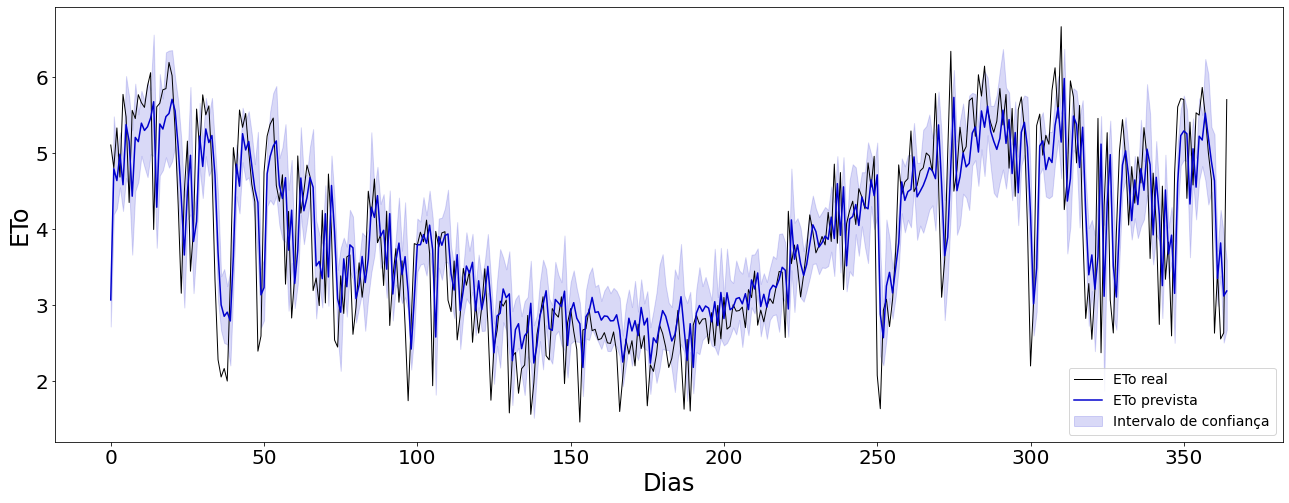

In [14]:
y_hat_CNN = np.zeros((365,100))
y_mean = np.zeros((365))
y_max = np.zeros((365))
y_min = np.zeros((365))
x = np.zeros((365))
for i in range(365):
    y = kde_list[0][i].sample(100)
    y_mean[i] = y.mean()
    y_max[i] = y.max()
    y_min[i] = y.min()
    y_hat_CNN[i,:] = y.reshape(1,-1)
    x[i] = i

fig, ax = plt.subplots(figsize=[22,8])
plt.grid(False)
plt.plot(x,test,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(x,y_mean,'-', color = 'mediumblue', ms=4, lw=1, alpha=1, label='ETo prevista',linewidth=1.5)
ax.fill_between(x, y_min, y_max, color='mediumblue', alpha=0.15, label='Intervalo de confiança')
plt.tick_params(labelsize=20)
plt.legend(fontsize=14)
plt.xlabel("Dias", fontsize=24)
plt.ylabel("ETo", fontsize=24)

##Analysis of residues for the forecast horizon 1

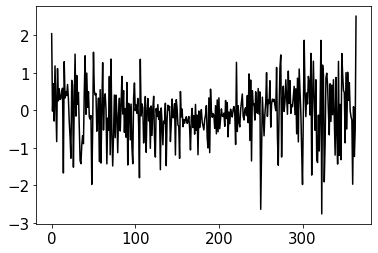

In [15]:
residuals = test - yhat[:,0]
plt.plot(x,residuals,'-', color = 'black', ms=4, lw=1, alpha=1, linewidth=1.5)
plt.tick_params(labelsize=15)

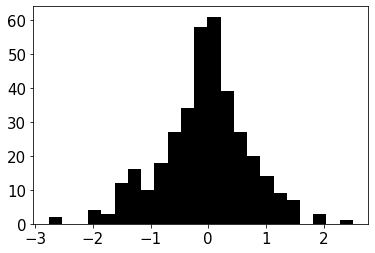

In [16]:
plt.hist(residuals, bins='auto', color='black')
plt.tick_params(labelsize=15)

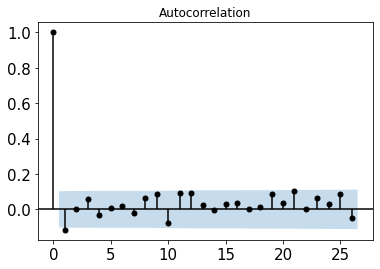

In [17]:
plot_acf(residuals, plt.gca(), color='black', )
plt.tick_params(labelsize=15)

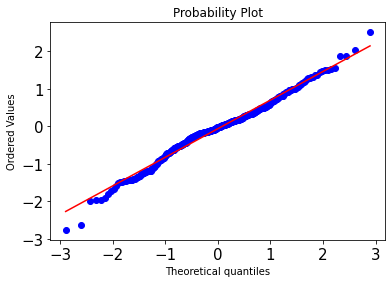

In [18]:
stats.probplot(np.reshape(residuals, (-1)), dist=stats.norm, plot=plt)
plt.tick_params(labelsize=15)
plt.show()